## KNN

In [1]:
### Reference: Develop k-Nearest Neighbors in Python From Scratch by Jason Brownlee
### on October 24, 2019 in Code Algorithms From Scratch
### Link: https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [2]:
#Import libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Implement knn

In [3]:
import math

# Euclidean distance
def euclidean_distance(x1, x2):
	dist = 0.0
	for i in range(len(x2)-1):
		dist += (x1[i] - x2[i])**2
	return math.sqrt(dist)

# Locate nearby points
def neighbor(newObservation, referenceData_row, k):
	distances = list()
	for newObservation_row in newObservation:
		dist = euclidean_distance(referenceData_row, newObservation_row)
		distances.append((newObservation_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(k):
		neighbors.append(distances[i][0])
	return neighbors

# Make a prediction with nearby points
def predict(newObservation, referenceData, k):
	neighbors = neighbor(newObservation, referenceData, k)
	output_values = [x[ len(x) -1] for x in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

# knn
def knn(newObservation, referenceData, k):
	predictions = list()
	for x in referenceData:
		output = predict(newObservation, x, k)
		predictions.append(output)
	return predictions

# Generate random 2D samples

In [4]:
np.random.seed(42)
n = 100 #data points

#Class 0
X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

#Class 1
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/2))

#Join data
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

#labels
l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2

print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Data

In [5]:
dt_2D = pd.DataFrame({'X':X,'Y':Y,'L':labels}, columns=['X','Y','L'])
dt_2D

,X,Y,L
0,-1.006572,0.324084,0
1,-2.276529,-0.385082,0
2,-0.704623,-0.676922,0
3,1.046060,0.611676,0
4,-2.468307,1.031000,0
...,...,...,...
95,3.563646,0.385317,1
96,-0.473901,-0.883857,1
97,-0.640913,0.153725,1
98,3.043883,0.058209,1


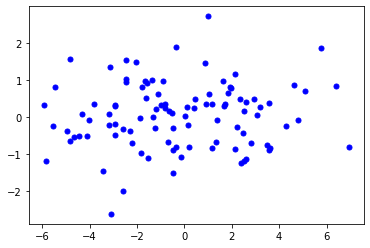

In [6]:
plt.scatter(X, Y, s =25, c = 'b')
plt.show()

# Seperate synthetic data 80/20 ratio

In [7]:
##Split data
X_train, X_test, Y_train, Y_test = train_test_split(dt_2D,labels, test_size=0.2, random_state=0)

In [8]:
#Reference Data
X_train

,X,Y,L
43,-2.602207,-0.327662,0
62,2.120460,1.158596,1
3,1.046060,0.611676,0
71,0.181225,-0.815810,1
45,-3.439688,-1.463515,0
...,...,...,...
96,-0.473901,-0.883857,1
67,-0.337356,1.896793,1
64,1.615278,0.963376,1
47,0.114244,0.261055,0


In [9]:
#newObservation
X_test

,X,Y,L
26,-4.301987,0.087047,0
86,0.433493,0.473238,1
2,-0.704623,-0.676922,0
55,2.808102,-0.714351,1
75,6.380911,0.827183,1
93,2.369268,-1.245739,1
16,-4.025662,-0.072010,0
73,-0.803702,0.341152,1
54,1.677429,0.293072,1
95,3.563646,0.385317,1


## Predict each point on the 2D data

In [10]:
pred_results = knn(X_train.to_numpy(),X_test.to_numpy(),3)

## Plot

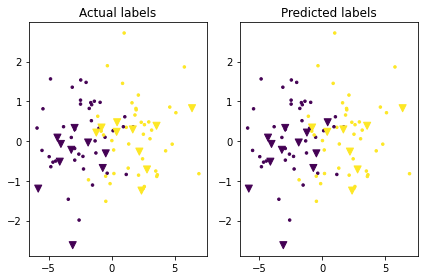

In [11]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=pred_results, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

## Accuracy Score:

In [12]:
print("Actual labels: ", Y_test)
print("Predicted labels: ", pred_results)
print("Accuracy score: ", accuracy_score(Y_test, pred_results))

Actual labels:  [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Predicted labels:  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Accuracy score:  0.9


# Generate random 3D data

In [13]:
n = 1000 #data points

#Class 0
X1 = np.random.normal(loc=0.0, scale=3, size=int(n/4))
Y1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))
Z1 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/4))

#Class 1
X2 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y2 = np.random.normal(loc=1.0, scale=2.0, size=int(n/4))
Z2 = np.random.normal(loc=1.0, scale=1.0, size=int(n/4))

# Class 2
X3 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y3 = np.random.normal(loc=3.0, scale=1.0, size=int(n/4))
Z3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/4))

#Class 3
X4 = np.random.normal(loc=0.0, scale=3.0, size=int(n/4))
Y4 = np.random.normal(loc=5.0, scale=3.0, size=int(n/4))
Z4 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/4))


#Join data
X = np.concatenate((X1, X2, X3, X4), axis=0)
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)
Z = np.concatenate((Z1, Z2, Z3, Z4), axis=0)

#labels
l1 = [0]*int(n/4)
l2 = [1]*int(n/4)
l3 = [2]*int(n/4)
l4 = [3]*int(n/4)
labels_3D = l1+l2+l3+l4
print(labels_3D)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Data

In [14]:
dt_3D = pd.DataFrame({'X':X,'Y':Y,'Z':Z,'L':labels_3D}, columns=['X','Y','Z','L'])
dt_3D

,X,Y,Z,L
0,1.073362,-3.062679,-1.522723,0
1,1.682354,-2.044858,0.049009,0
2,3.249154,-3.985726,-1.704344,0
3,3.161406,-2.495953,-2.408461,0
4,-4.133008,-3.530258,-2.556629,0
...,...,...,...,...
995,4.294100,1.556926,-4.880010,3
996,3.245300,5.255628,-2.287288,3
997,-3.936658,-3.973408,-4.883150,3
998,1.866210,4.439312,-3.372319,3


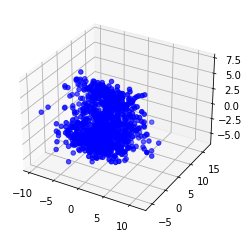

In [15]:
plt.axes(projection='3d').scatter3D(X, Y, Z, c='b', cmap='Greens');

# Seperate synthetic data

In [16]:
X_train_3D, X_test_3D, Y_train_3D, Y_test_3D = train_test_split(dt_3D,labels_3D, test_size=0.2, random_state=0)

In [17]:
#Reference Data
X_train_3D

,X,Y,Z,L
687,1.272183,4.549020,3.075767,2
500,1.051890,1.226968,5.804348,2
332,1.197669,2.416217,1.323168,1
979,-0.790345,7.956349,-2.484372,3
817,-6.657901,6.364223,-5.832156,3
...,...,...,...,...
835,-0.885270,3.944236,-2.553127,3
192,-3.960700,-3.259591,0.066675,0
629,0.056549,2.549811,4.849102,2
559,3.944743,3.937570,4.198948,2


In [18]:
#Observation data
X_test_3D

,X,Y,Z,L
993,-0.403490,4.428491,-3.617642,3
859,2.772810,3.351379,-3.395681,3
298,-1.713537,1.467572,2.024063,1
553,-5.491899,2.692038,3.987911,2
672,-0.924103,2.980740,4.160018,2
...,...,...,...,...
679,-2.417610,3.718186,4.260281,2
722,-3.218229,2.680152,3.770609,2
215,-2.245460,-2.893570,-0.720978,0
653,2.757463,4.125435,2.634044,2


# Predict each point on 3D plot

In [19]:
pred_results_3D = knn(X_train_3D.to_numpy(),X_test_3D.to_numpy(),3)

# Accuracy score

In [20]:
print("Actual labels: ", Y_test_3D)
print("Predicted labels: ", pred_results_3D)
print("Accuracy score: ", accuracy_score(Y_test_3D, pred_results_3D))

Actual labels:  [3, 3, 1, 2, 2, 3, 0, 0, 1, 2, 1, 2, 3, 0, 2, 0, 3, 0, 0, 0, 0, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3, 2, 2, 3, 1, 2, 3, 1, 3, 1, 0, 3, 2, 2, 1, 3, 3, 0, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 3, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 2, 0, 2, 1, 3, 1, 1, 3, 1, 2, 1, 2, 0, 1, 2, 3, 3, 0, 3, 1, 2, 2, 3, 3, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 0, 3, 0, 3, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 1, 0, 2, 3, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 3, 3, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 0, 2, 3, 0, 3, 3, 1, 1, 3, 3, 2, 1, 3, 0, 3, 3, 1, 0, 3, 2, 2, 0, 2, 0]
Predicted labels:  [3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 0.0, 0.0, 2.0, 2.0, 1.0, 1.0, 3.0, 0.0, 2.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 2.0, 2.0, 3.0, 0.0, 2.0, 3.0, 1.0, 3.0, 1.0, 0.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0

# Plot

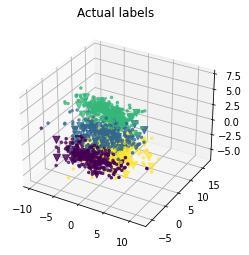

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_3D.iloc[:,0],X_train_3D.iloc[:,1],X_train_3D.iloc[:,2], s=25, c=Y_train_3D, marker=".")
ax.scatter(X_test_3D.iloc[:,0],X_test_3D.iloc[:,1],X_test_3D.iloc[:,2], s=50, c=Y_test_3D, marker="v")
plt.title("Actual labels")

plt.show()

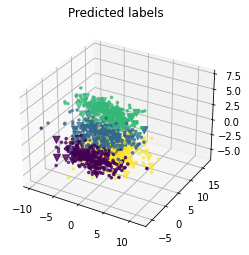

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_3D.iloc[:,0],X_train_3D.iloc[:,1],X_train_3D.iloc[:,2], s=25, c=Y_train_3D, marker=".")
ax.scatter(X_test_3D.iloc[:,0],X_test_3D.iloc[:,1],X_test_3D.iloc[:,2], s=50, c=pred_results_3D, marker="v")
plt.title("Predicted labels")

plt.show()